# Kaggle Task for data science with pandas ai

https://www.kaggle.com/code/harunshimanto/pandas-with-data-science-ai

In [1]:
import pandas as pd # import libraries

## Read The Data-set

In [2]:
ratings = pd.read_csv(r"C:\Users\mikun\Downloads\archive\rating.csv")

In [4]:
ratings.shape

(20000263, 4)

In [27]:
ratings.head(3)

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5


In [5]:
tags = pd.read_csv(r"C:\Users\mikun\Downloads\archive\tag.csv")

In [6]:
tags.shape

(465564, 4)

In [7]:
tags.head(3)

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19


In [9]:
movies = pd.read_csv(r"C:\Users\mikun\Downloads\archive\movie.csv")
movies.shape

(27278, 3)

In [10]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [11]:
print(tags.columns)
print(ratings.columns)
print(movies.columns)

Index(['userId', 'movieId', 'tag', 'timestamp'], dtype='object')
Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')
Index(['movieId', 'title', 'genres'], dtype='object')


In [13]:
del ratings["timestamp"]
del tags["timestamp"]

In [14]:
print(tags.columns)
print(ratings.columns)
print(movies.columns)

Index(['userId', 'movieId', 'tag'], dtype='object')
Index(['userId', 'movieId', 'rating'], dtype='object')
Index(['movieId', 'title', 'genres'], dtype='object')


### Series

In [17]:
tags.head(3)

,userId,movieId,tag
0,18,4141,Mark Waters
1,65,208,dark hero
2,65,353,dark hero


In [21]:
row_0 = tags.iloc[0]
row_0

userId              18
movieId           4141
tag        Mark Waters
Name: 0, dtype: object

In [22]:
row_1 = tags.iloc[1]
row_1

userId            65
movieId          208
tag        dark hero
Name: 1, dtype: object

In [24]:
row_0.index

Index(['userId', 'movieId', 'tag'], dtype='object')

In [25]:
row_0["userId"]

np.int64(18)

In [26]:
'rating' in row_0

False

In [28]:
row_0.name

0

In [29]:
row_0 = row_0.rename("firstRow")
row_0.name

'firstRow'

# DataFrames

In [30]:
tags.head()

,userId,movieId,tag
0,18,4141,Mark Waters
1,65,208,dark hero
2,65,353,dark hero
3,65,521,noir thriller
4,65,592,dark hero


In [31]:
tags.index

RangeIndex(start=0, stop=465564, step=1)

In [32]:
tags.columns

Index(['userId', 'movieId', 'tag'], dtype='object')

In [33]:
tags.iloc[[0,11,500]]

,userId,movieId,tag
0,18,4141,Mark Waters
11,65,1783,noir thriller
500,342,55908,entirely dialogue


# Descriptive Statistics
* Let's look how the ratings are distributed

In [34]:
ratings["rating"].describe()

count    2.000026e+07
mean     3.525529e+00
std      1.051989e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [35]:
ratings.describe()

,userId,movieId,rating
count,2.000026e+07,2.000026e+07,2.000026e+07
mean,6.904587e+04,9.041567e+03,3.525529e+00
std,4.003863e+04,1.978948e+04,1.051989e+00
min,1.000000e+00,1.000000e+00,5.000000e-01
25%,3.439500e+04,9.020000e+02,3.000000e+00
50%,6.914100e+04,2.167000e+03,3.500000e+00
75%,1.036370e+05,4.770000e+03,4.000000e+00
max,1.384930e+05,1.312620e+05,5.000000e+00


In [36]:
ratings['rating'].mean()

np.float64(3.5255285642993797)

In [39]:
ratings.head(3)

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5


In [43]:
ratings.mean() # mean of all cols

userId     69045.872583
movieId     9041.567330
rating         3.525529
dtype: float64

In [45]:
ratings['rating'].min() # minimum of rating column

0.5

In [46]:
ratings['rating'].max() # maximum of rating column

5.0

In [47]:
ratings['rating'].std() # standard deviation of rating column

1.051988919275684

In [49]:
ratings['rating'].mode() # returns highest frequency value in the column

0    4.0
Name: rating, dtype: float64

In [51]:
ratings.mode()

,userId,movieId,rating
0,118205,296,4.0


In [65]:
"""
.corr(): found the correlation between the columns
-> values range from +1 to -1.
-> +1 indicates a perfect +ve relation.
-> -1 indicates a perfect -ve relation.
-> 0 indicates no relation
"""
ratings.corr()

,userId,movieId,rating
userId,1.000000,-0.000850,0.001175
movieId,-0.000850,1.000000,0.002606
rating,0.001175,0.002606,1.000000


In [79]:
filter1 = ratings["rating"]>10
filter1

0           False
1           False
2           False
3           False
4           False
            ...  
20000258    False
20000259    False
20000260    False
20000261    False
20000262    False
Name: rating, Length: 20000263, dtype: bool

In [76]:
filter2 = ratings['rating'] > 0
filter2

0           True
1           True
2           True
3           True
4           True
            ... 
20000258    True
20000259    True
20000260    True
20000261    True
20000262    True
Name: rating, Length: 20000263, dtype: bool

# Data Cleaning: Handling Missing Data

In [81]:
movies.shape

(27278, 3)

In [82]:
movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [84]:
ratings.shape

(20000263, 3)

In [86]:
ratings.isnull().sum()

userId     0
movieId    0
rating     0
dtype: int64

In [87]:
tags.shape

(465564, 3)

In [88]:
tags.isnull().sum()

userId      0
movieId     0
tag        16
dtype: int64

In [89]:
tags = tags.dropna()

In [91]:
tags.isnull().sum()

userId     0
movieId    0
tag        0
dtype: int64

In [92]:
tags.shape

(465548, 3)

<p> We have got no NULL values ! in all the the datasets</p>

# Data Visualization

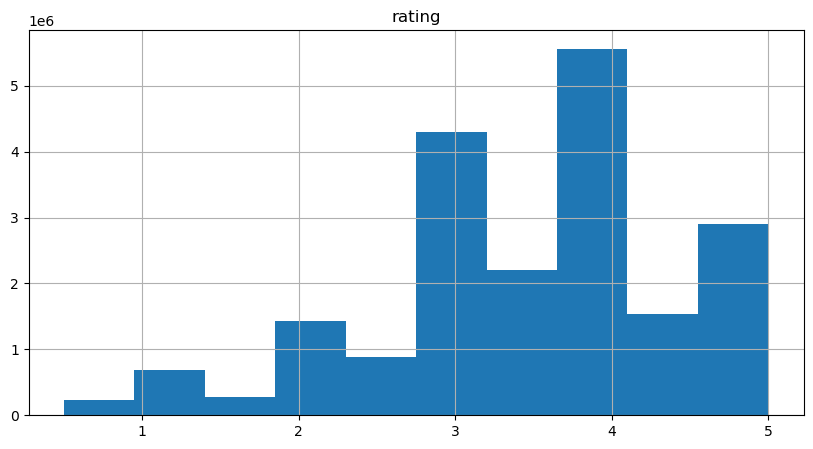

In [97]:
import matplotlib.pyplot as plt
%matplotlib inline

ratings.hist(column='rating',figsize=(10,5))
plt.show()

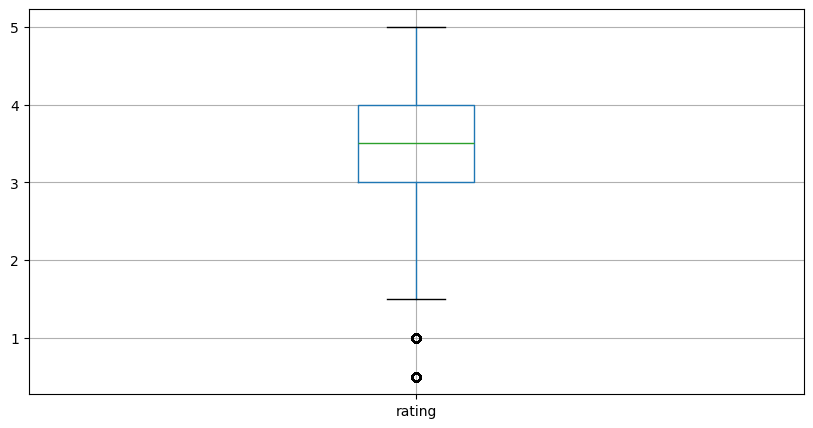

In [99]:
ratings.boxplot(column='rating', figsize=(10,5))
plt.show()

## Slicing out Columns

In [100]:
tags['tag'].head()

0      Mark Waters
1        dark hero
2        dark hero
3    noir thriller
4        dark hero
Name: tag, dtype: object

In [101]:
movies[['title','genres']].head()

,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy


In [102]:
ratings[-10:]

,userId,movieId,rating
20000253,138493,60816,4.5
20000254,138493,61160,4.0
20000255,138493,65682,4.5
20000256,138493,66762,4.5
20000257,138493,68319,4.5
20000258,138493,68954,4.5
20000259,138493,69526,4.5
20000260,138493,69644,3.0
20000261,138493,70286,5.0
20000262,138493,71619,2.5


In [103]:
tag_counts = tags['tag'].value_counts()
tag_counts[-10:]

tag
chiptunes         1
ewan macgregor    1
Disguises         1
retarted          1
operatic          1
heartrending      1
film crew         1
es                1
girltalk          1
Spanish films     1
Name: count, dtype: int64

In [104]:
tag_counts.head(3)

tag
sci-fi             3384
based on a book    3281
atmospheric        2917
Name: count, dtype: int64

In [105]:
tag_counts.tail(3)

tag
es               1
girltalk         1
Spanish films    1
Name: count, dtype: int64

In [139]:
tag_counts.head(3)

tag
sci-fi             3384
based on a book    3281
atmospheric        2917
Name: count, dtype: int64

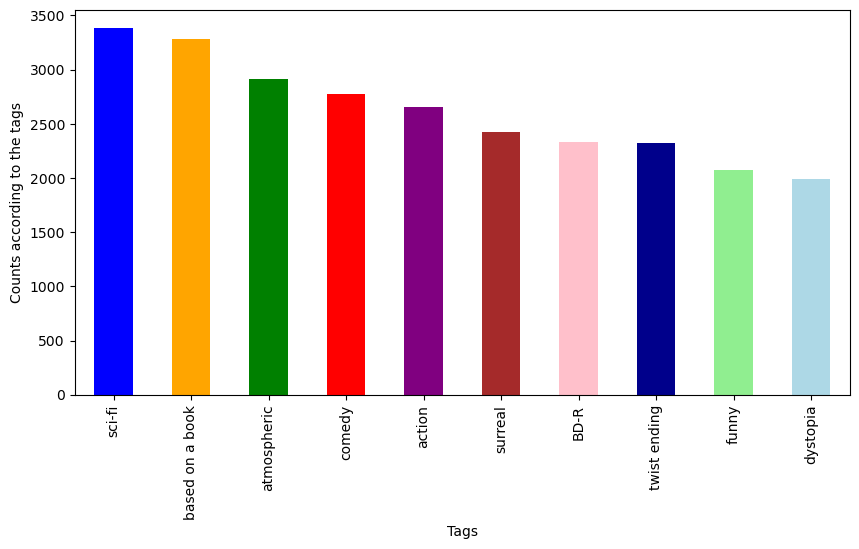

In [138]:
tag_counts[:10].plot(kind="bar",figsize=(10,5),
                    xlabel = "Tags",
                    ylabel = "Counts according to the tags",
                    color = ["blue","orange", "green", "red", "purple", "brown", "pink", "darkblue", "lightgreen", "lightblue"]
                    # colormap = "inferno"
                    )
plt.show()